# Customer Analysis Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

## Loading Data

In [2]:
df = pd.read_csv('Supermarket_customers.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Descriptive Statistics

In [3]:
# Check the shape of the dataset
print(df.shape)

# Check the data types of each column
print(df.dtypes)

# Get a summary of the dataset
print(df.describe())

(2240, 29)
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object
                 ID   Year_Birth         Income      Kidhome     Teenhome  \

What about changing Year_Birth to age? A todo for later to see the effect.

### Missing Values

In [4]:
# Check for missing values in the 'Income' column
print(df['Income'].isnull().sum())

24


In [5]:
# Function to impute missing values in 'Income' with the mode based on 'Education' and 'Marital_Status'
def impute_mode(row):
    if pd.isnull(row['Income']):
        return df[(df['Education'] == row['Education']) & 
                   (df['Marital_Status'] == row['Marital_Status'])]['Income'].mode()[0]
    else:
        return row['Income']

# Apply the function to fill missing values
df['Income'] = df.apply(impute_mode, axis=1)

### Outliers

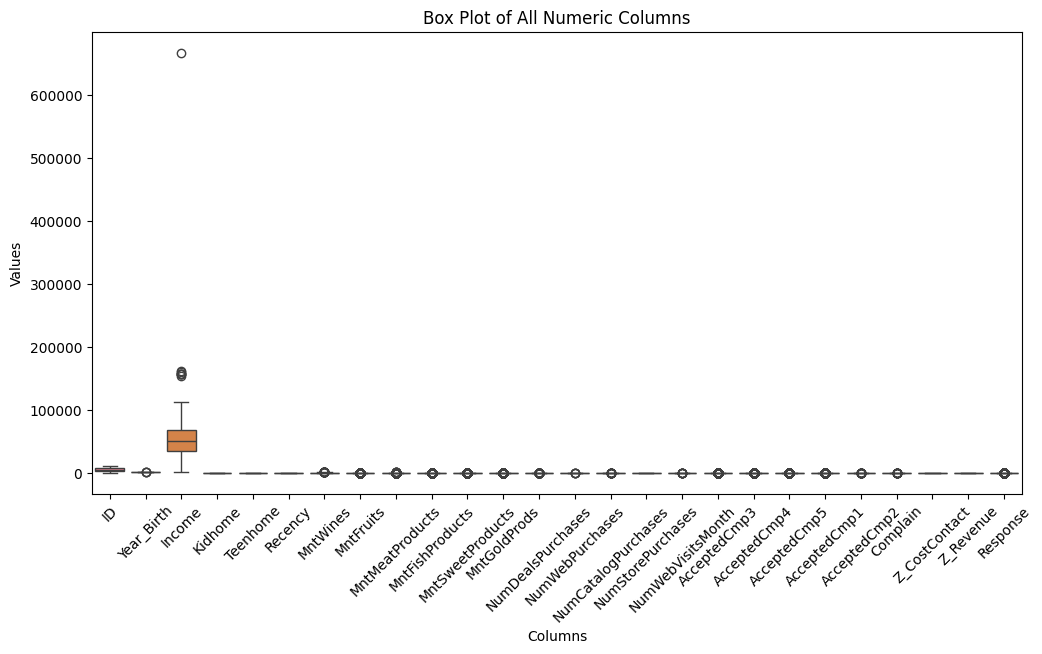

In [6]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create box plots for all numeric columns
sns.boxplot(data=df.select_dtypes(include=[np.number]))

# Add title and labels
plt.title('Box Plot of All Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

### Handling Outliers

In [7]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

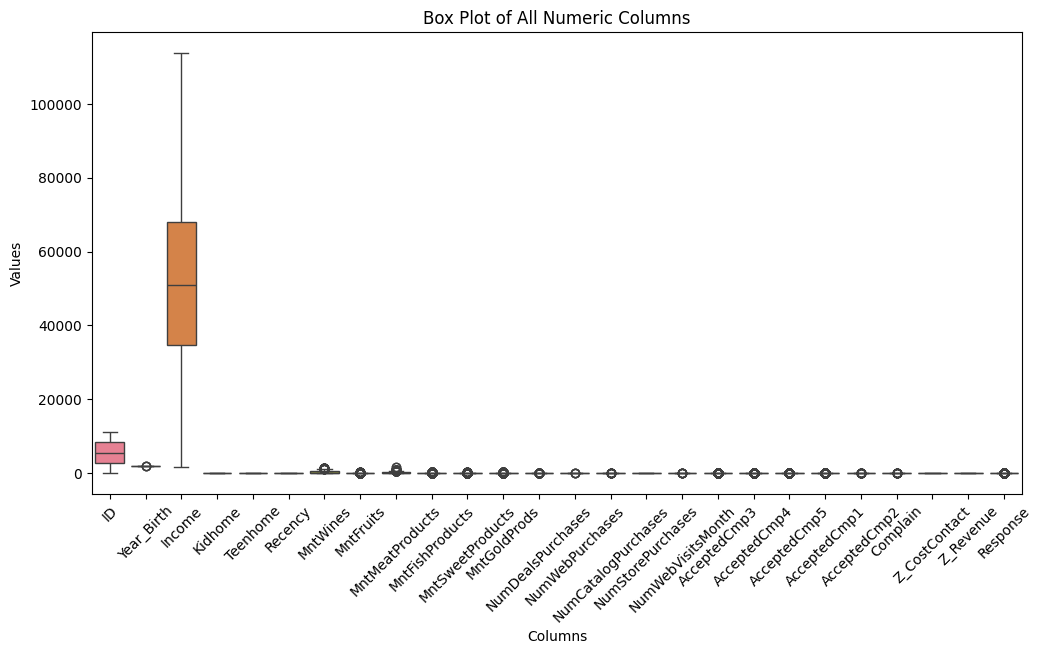

In [8]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create box plots for all numeric columns
sns.boxplot(data=df.select_dtypes(include=[np.number]))

# Add title and labels
plt.title('Box Plot of All Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,...,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.0,2232.0,2232.000000
mean,5590.736559,1968.792563,51287.370072,0.444444,0.507168,49.111111,304.930108,26.380376,165.319444,37.644713,...,5.331541,0.073029,0.074821,0.073029,0.064516,0.013441,0.009409,3.0,11.0,0.149642
std,3246.390817,11.990340,20943.708452,0.538567,0.544680,28.952893,336.784950,39.821532,219.401447,54.689504,...,2.415275,0.260242,0.263161,0.260242,0.245725,0.115179,0.096562,0.0,0.0,0.356800
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,34686.250000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,50988.500000,0.000000,0.000000,49.000000,176.000000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68120.000000,1.000000,1.000000,74.000000,505.000000,33.000000,231.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# Columns Z_CostContact and Z_Revenue have the same value for all entries and doesnt add anything to the data.
df.drop(columns=['Z_CostContact','Z_Revenue'], inplace=True, axis=1)

df = df.set_index('ID')

In [12]:
avg_income_by_education = df.groupby('Education')['Income'].mean()
print('Education:', avg_income_by_education.round(2))

avg_income_by_maritalStatus = df.groupby('Marital_Status')['Income'].mean()
print('Marital Status:', avg_income_by_maritalStatus.round(2))

Education: Education
2n Cycle      47118.07
Basic         20306.26
Graduation    51616.59
Master        52191.85
PhD           55054.07
Name: Income, dtype: float64
Marital Status: Marital_Status
Absurd      72365.50
Alone       43789.00
Divorced    52396.61
Married     51056.94
Single      50323.19
Together    51312.53
Widow       56177.26
YOLO        48432.00
Name: Income, dtype: float64


### Convert Data Types:

In [13]:
# Convert date strings to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed')

In [ ]:
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Marital_Status'])

df_encoded = df_encoded.set_index('ID')
df_encoded

## Exploratory Data Analysis

- Uncover insights about customer behavior and campaign success.

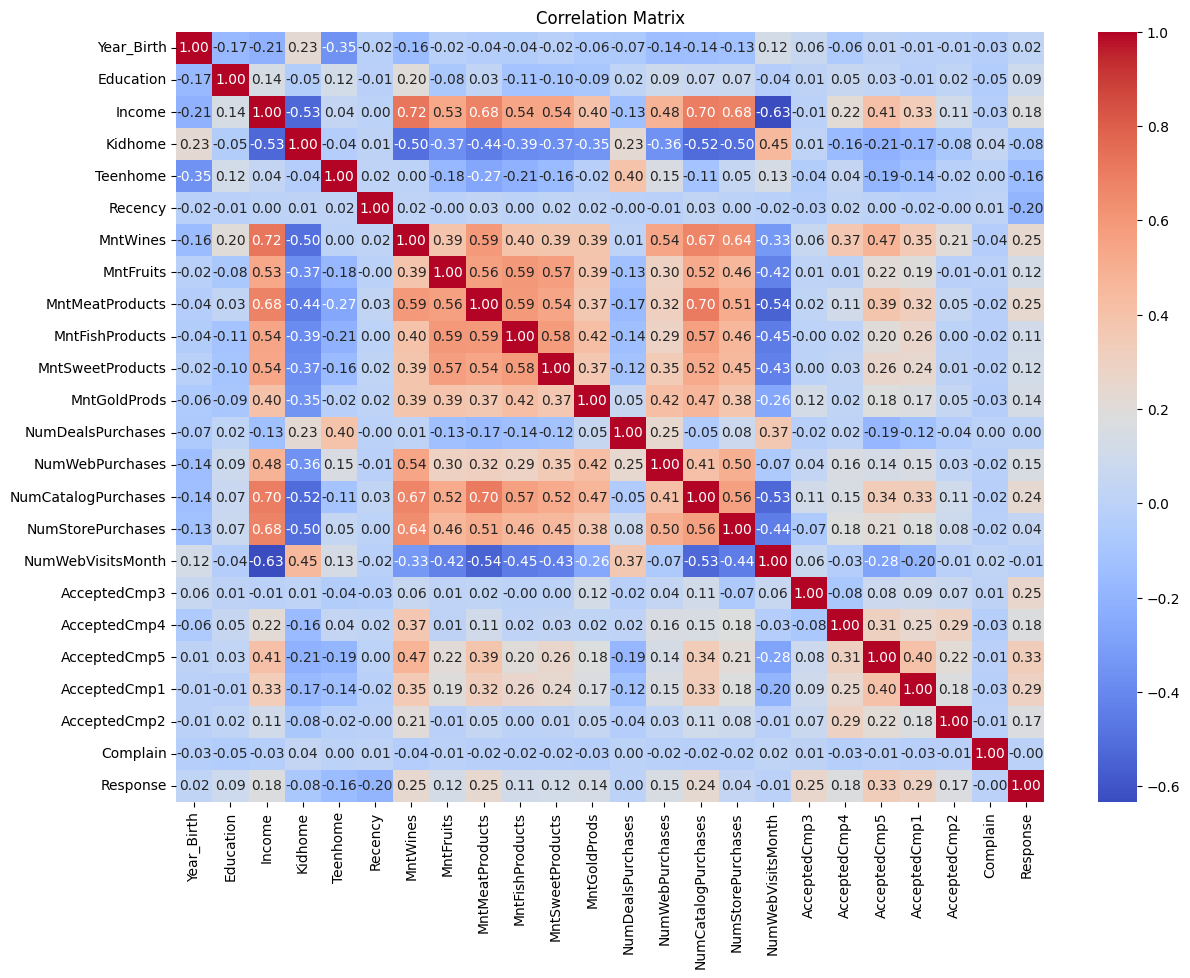

In [20]:
# Example heatmap for correlations
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

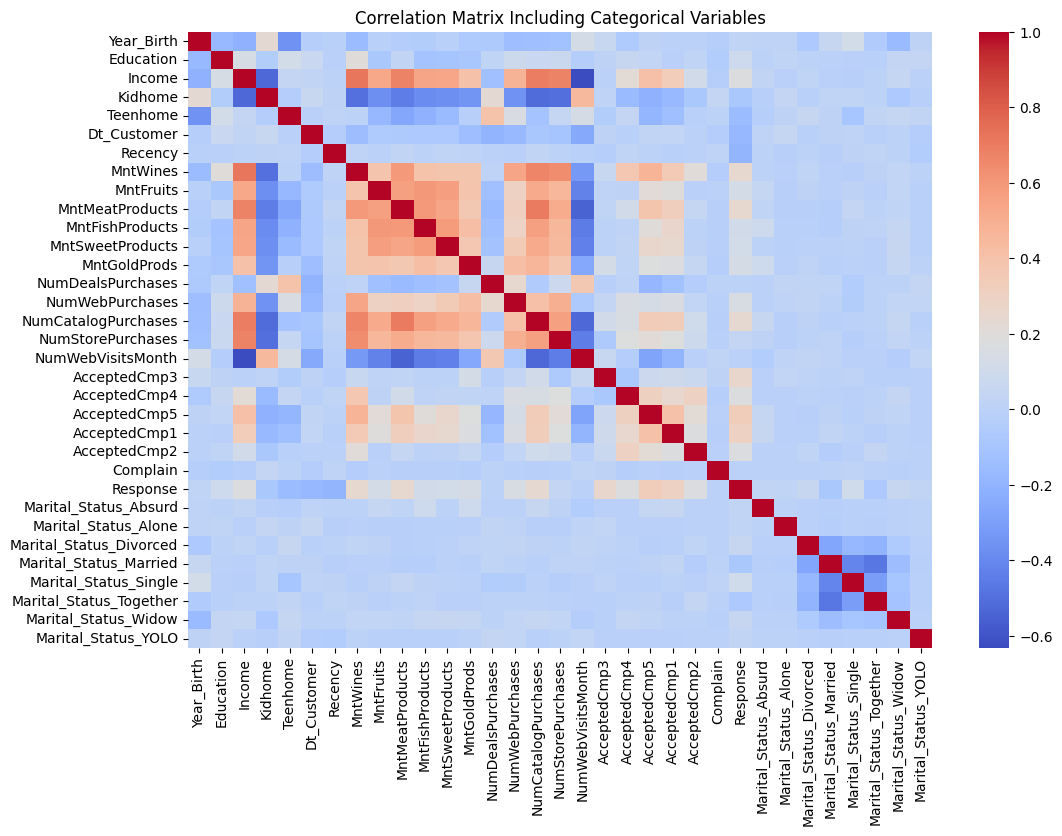

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Including Categorical Variables')
plt.show()

dfdate = df_encoded.copy()
dfdate['year'] = dfdate['Dt_Customer'].dt.year
dfdate['month'] = dfdate['Dt_Customer'].dt.month
dfdate['day'] = dfdate['Dt_Customer'].dt.day
dfdate.drop(['Dt_Customer'], axis=1, inplace=True)

plt.figure(figsize=(16, 10))
sns.heatmap(dfdate.corr(), fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Including Categorical Variables')
plt.show()

**Basic Distributions:**

array([[<Axes: title={'center': 'Year_Birth'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>],
       [<Axes: title={'center': 'Dt_Customer'}>,
        <Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>],
       [<Axes: title={'center': 'MntFishProducts'}>,
        <Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>],
       [<Axes: title={'center': 'NumCatalogPurchases'}>,
        <Axes: title={'center': 'NumStorePurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>,
        <Axes: title={'center': 'AcceptedCmp3'}>,
        <Axes: title={'center': 'AcceptedCmp4

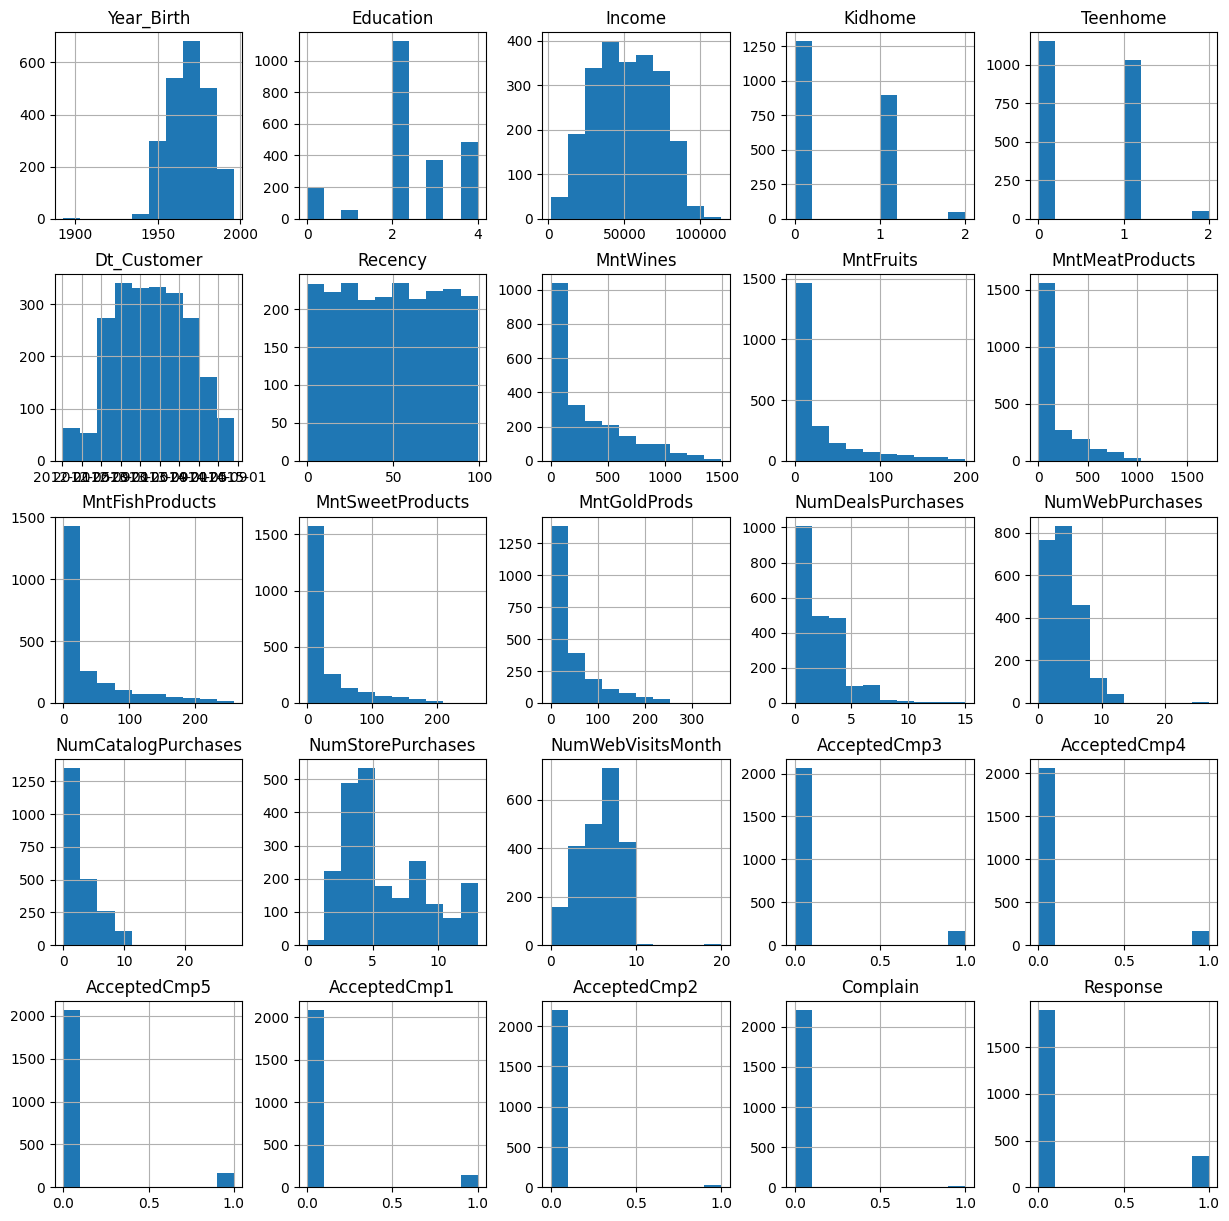

In [ ]:
# Plot histograms for numerical variables.
df_encoded.hist(figsize=(15, 15))

<Axes: xlabel='Education', ylabel='count'>

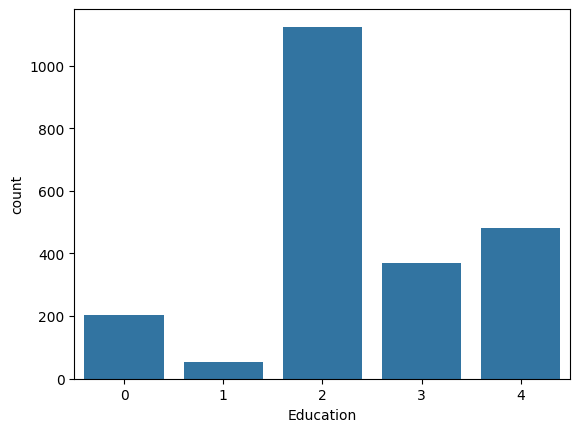

In [27]:
# Visualize categorical distributions
sns.countplot(data=df_encoded, x='Education')
#sns.countplot(data=df_encoded, x='Marital_Status')
